In [1]:
import numpy as np
from lattice_class import *
from hamiltonian_constructor_class import *
import scipy.linalg
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 150
plt.rcParams["savefig.dpi"] = 150

# 1. Create Lattice

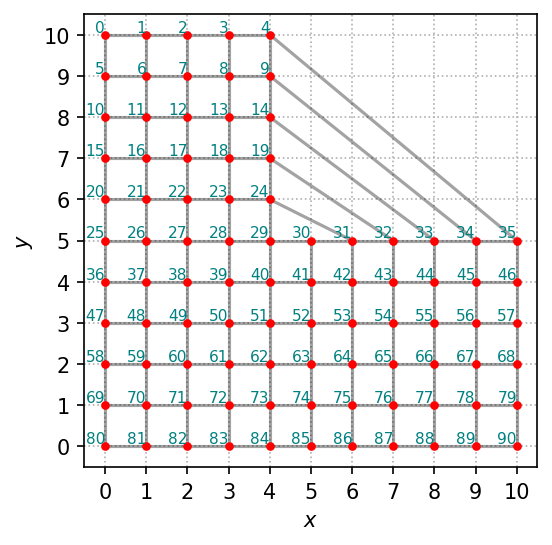

In [2]:
n = 1
hop_phase = np.exp(n * complex(0.0, 1.0) * np.pi / 2.0)


N = 11
lattice = SquareLattice(N, "open")
lattice.add_edges(
    [(N // 2 - 1 + i * N, N // 2 * N + N - 1 - i) for i in range(N // 2)],
    [(2, 0) for i in range(N // 2)],
)
lattice.remove_sites([(i * N + j) for i in range(N // 2) for j in range(N // 2, N)])

# flagged_edges = [(28, 29), (39, 40), (50, 51), (61, 62), (72, 73), (83, 84)]
# flagged_edges = [(51, 52), (62, 63), (73, 74), (84, 85)]
# flagged_edges = [(25, 36), (26, 37), (27, 38), (28, 39), (29, 40)]
flagged_edges = [(30, 31), (41, 42), (52, 53), (62, 64), (74, 75), (85, 86)]

lattice_sites = lattice.get_sites()
lattice_edges = lattice.get_edges()
num_sites = lattice.get_num_sites()
lattice.plot(True, c="r")

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ...

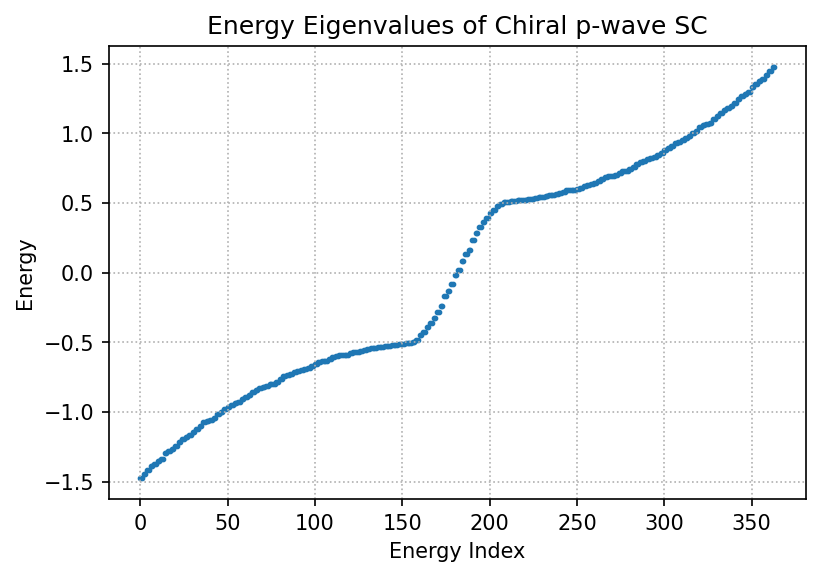

In [3]:
mu = 0.5
delta = complex(0.5, 0.0)

Ham_constructor = HamiltonianConstructor(mu, 0.5, 0.5, delta)
H_direct_lattice = Ham_constructor.construct_direct_lattice_hamiltonian(lattice)
block_indices = Ham_constructor.get_block_indices(lattice.get_num_sites())

for flagged_edge in flagged_edges:
    Ham_constructor.add_tunneling_phase(
        H_direct_lattice, flagged_edge, hop_phase, num_sites
    )

energies, states = scipy.linalg.eigh(H_direct_lattice)

tol = 0.05
low_energy_indices = np.argwhere(np.abs(energies) < tol)[:, 0]
print(low_energy_indices)

print("Lowest found energy: ", np.min(np.abs(energies)))
gs_idx = np.argmin(np.abs(energies))
print("Index of lowest absolute energy: ", gs_idx)

plt.xlabel("Energy Index")
plt.ylabel("Energy")
plt.grid(linestyle=":")
plt.title("Energy Eigenvalues of Chiral p-wave SC")
plt.scatter(range(len(energies)), energies, s=3)

Index = 179


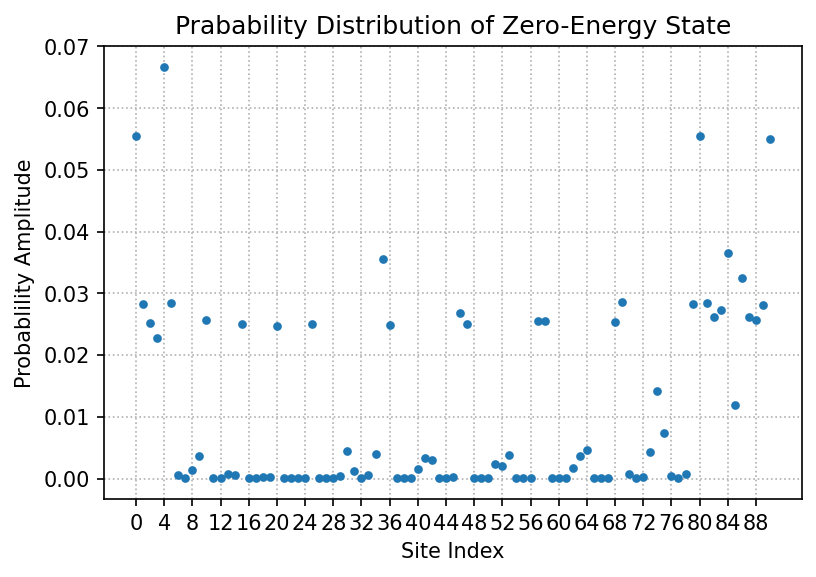

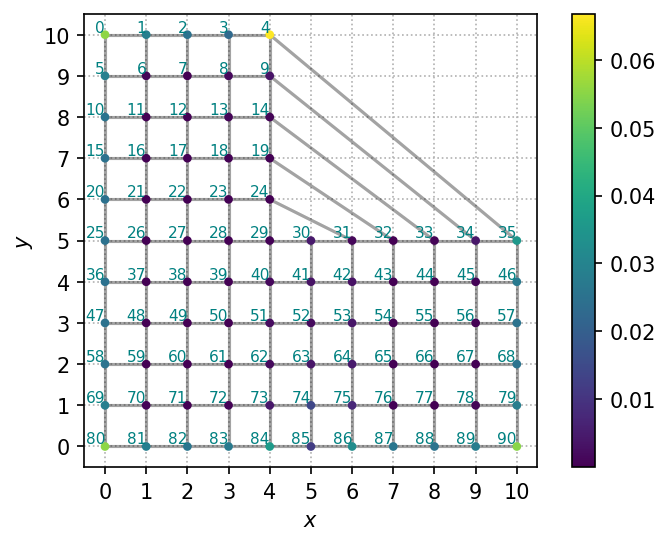

Index = 180


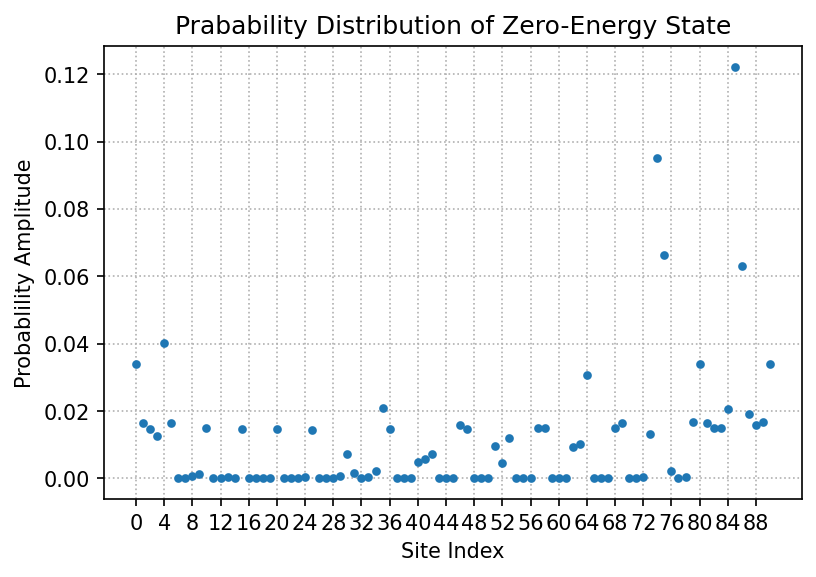

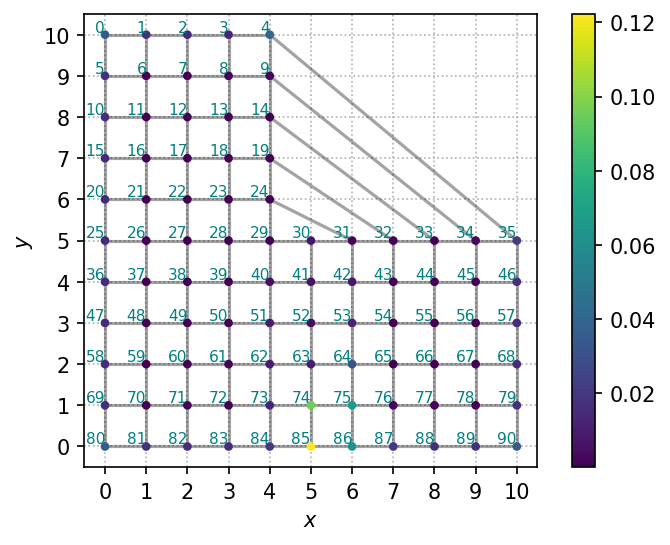

Index = 181


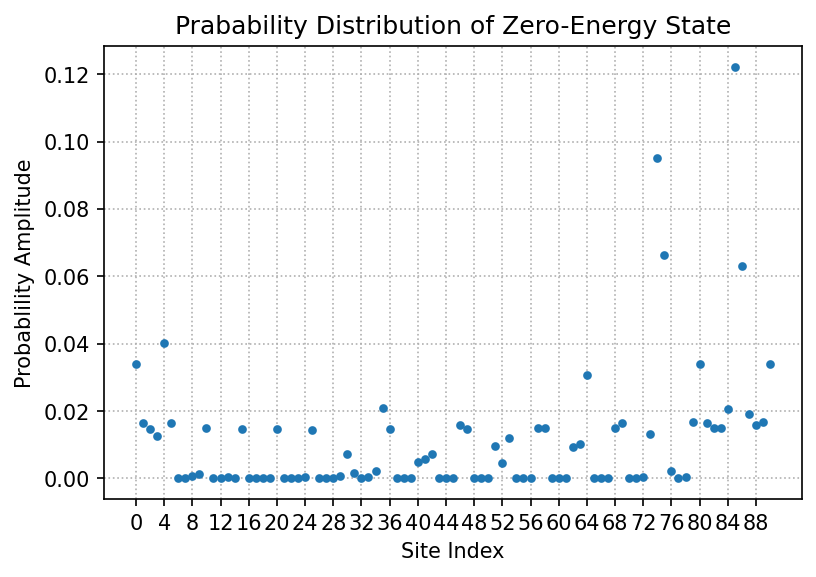

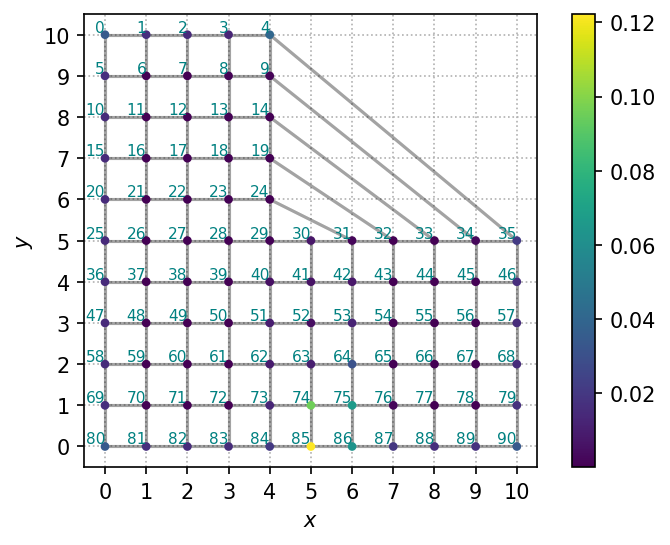

Index = 182


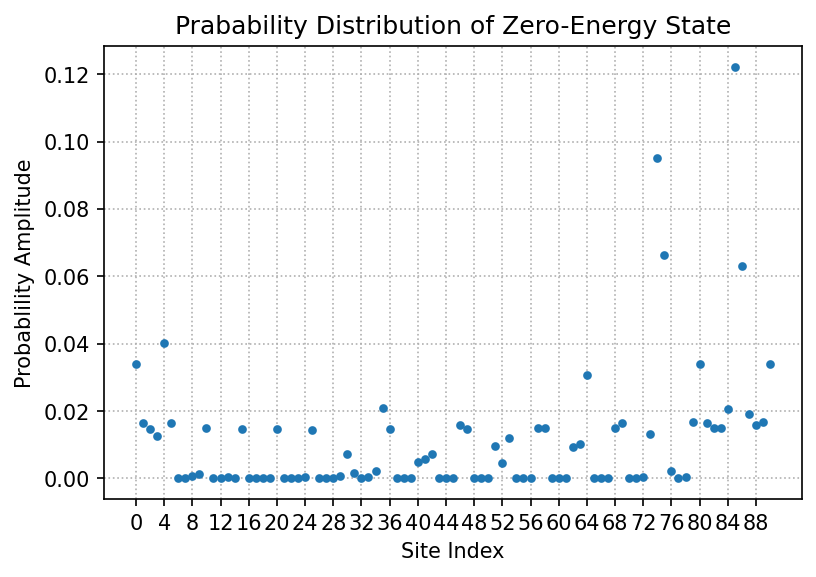

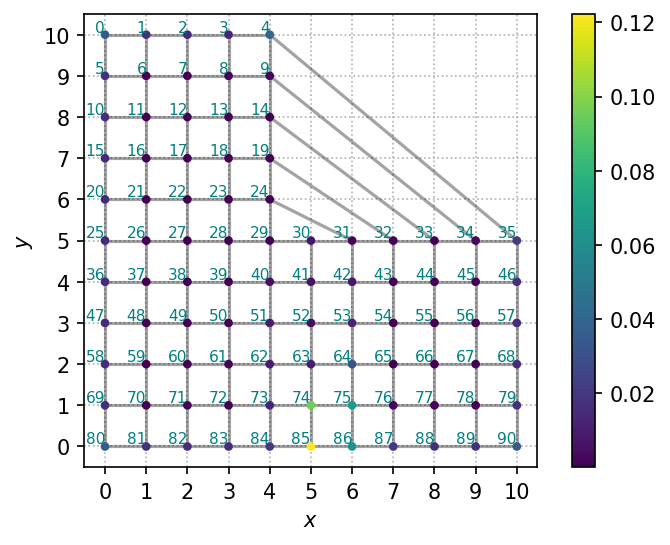

Index = 183


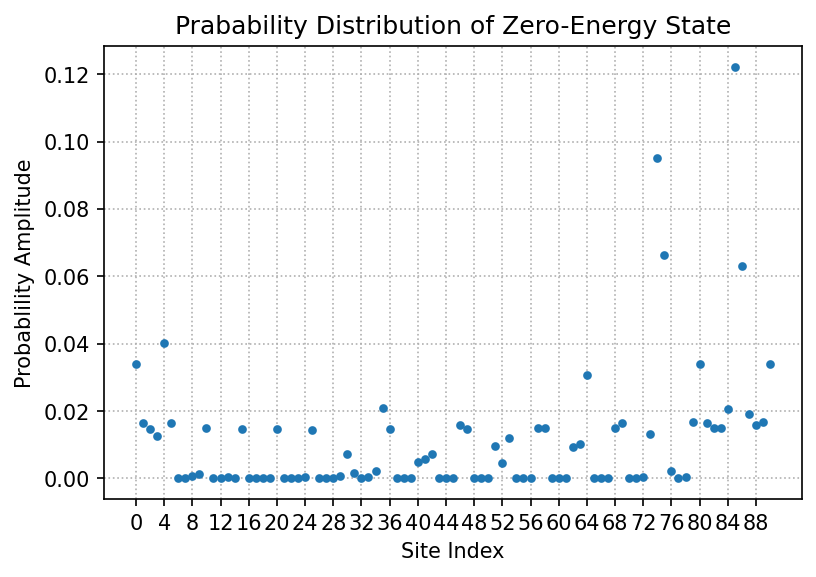

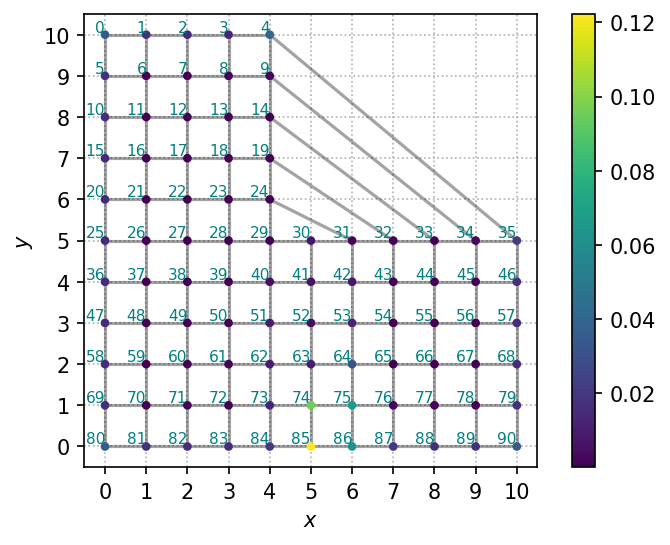

Index = 184


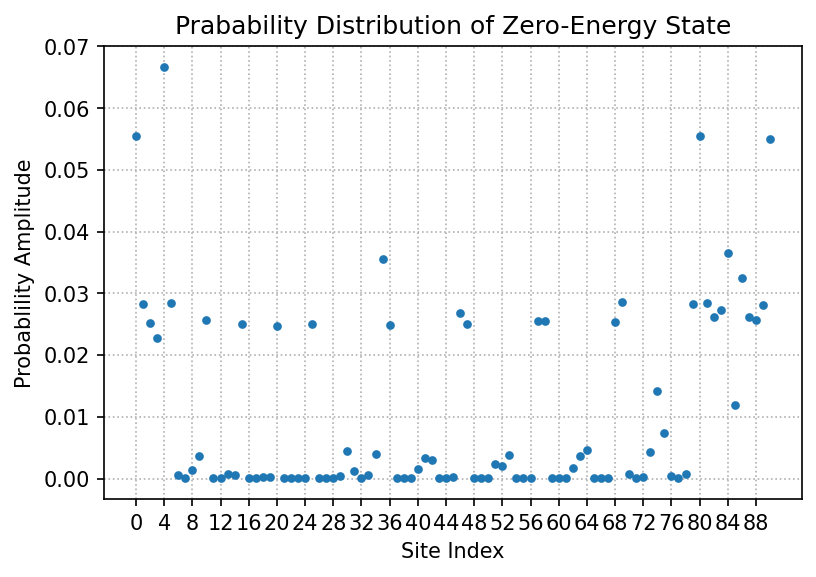

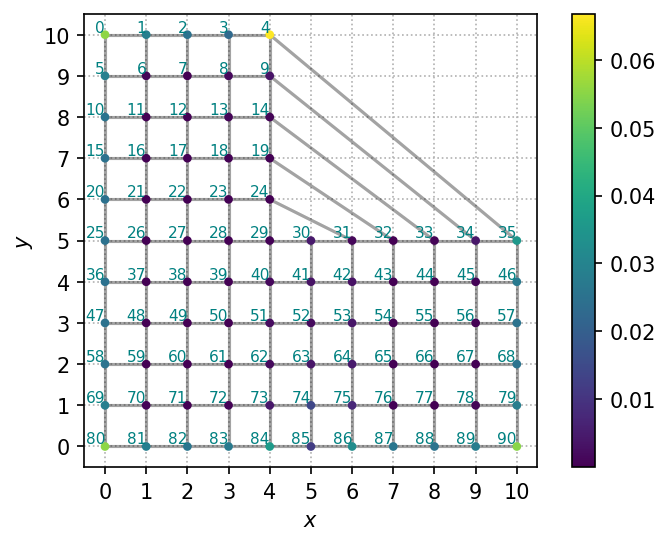

Index = 185


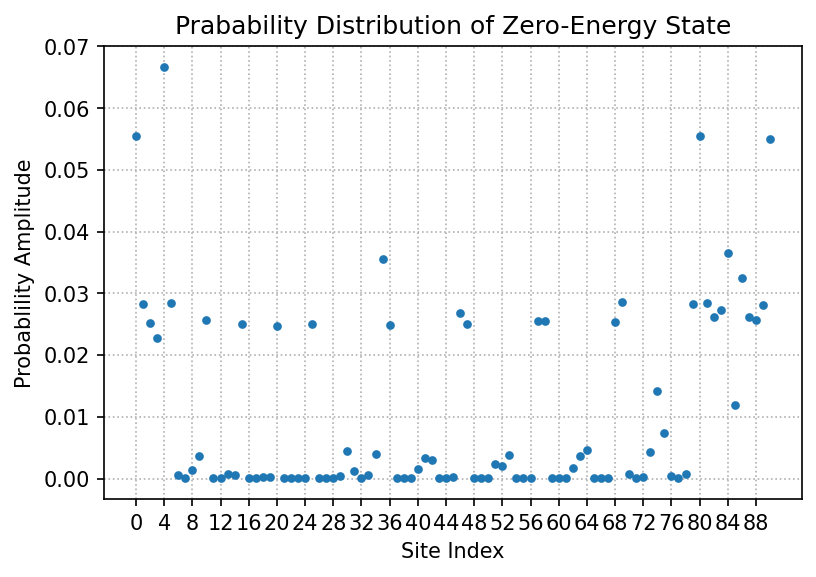

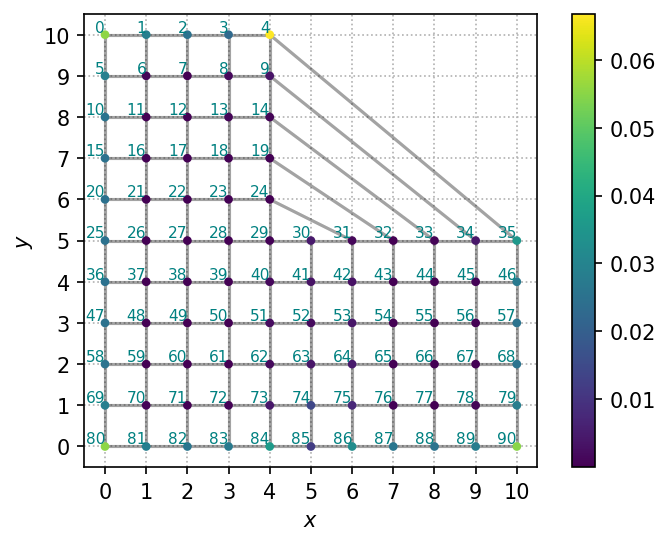

In [4]:
for gs_idx in range(gs_idx - 3, gs_idx + 4):
    print("Index =", gs_idx)
    gs_wave_function = states[:, gs_idx]
    gs_probabilities_nambu = np.square(np.abs(gs_wave_function))
    gs_probabilities = np.zeros(shape=(num_sites, 1))

    for site_idx in range(num_sites):
        gs_probabilities[site_idx] = np.sum(
            gs_probabilities_nambu[block_indices[site_idx]]
        )

    plt.xlabel("Site Index")
    plt.xticks(range(0, num_sites, num_sites // min(num_sites, 20)))
    plt.ylabel("Probablility Amplitude")
    plt.title("Prabability Distribution of Zero-Energy State")
    plt.grid(linestyle=":", zorder=-10)
    plt.scatter(range(num_sites), gs_probabilities, s=10, zorder=10)

    x_values = [k[0] for k in lattice_sites]
    y_values = [k[1] for k in lattice_sites]

    color_map = plt.get_cmap("viridis")
    sc = lattice.plot(True, c=(gs_probabilities), cmap=color_map)
    plt.colorbar(sc)
    plt.show()

## Hop phase results

### Including edge nearest to disclination
n = 0: hop_phase  = $e^{\frac{n\pi}{2}} = 1.0$ hase Lowest found energy:  0.04159891581792905

n = 1: hop_phase = $e^{\frac{n\pi}{2}} = 1.0i$ has Lowest found energy:  0.040238925057125174

n = -1: hop_phase = $e^{\frac{n\pi}{2}}= -1.0i$ has Lowest found energy:  0.04023892505712552

### Excluding edge nearest to disclination
n = 0: hop_phase  = $e^{\frac{n\pi}{2}} = 1.0$ hase Lowest found energy:  0.04159891581792905

n = 1: hop_phase = $e^{\frac{n\pi}{2}} = 1.0i$ has Lowest found energy:  0.040297000282122006

n = -1: hop_phase = $e^{\frac{n\pi}{2}}= -1.0i$ has Lowest found energy:  0.040297000282122006

In [5]:
half_filling_energy = np.sum(energies[0 : 2 * num_sites])
print("Half filling energy =", half_filling_energy)

Half filling energy = -140.10830344738503


### Including edge nearest to disclination
$$n=+1: -140.92351803436424$$


$$n=-1: -140.92351803436426$$


$$n=0: -141.16633516847492$$


$$n=2: -140.51117786827353$$


### Exluding edge nearest to disclination
$$n=+1: -140.98592954483732$$


$$n=-1: -140.98592954483732$$


$$n=0: -141.16633516847492$$


$$n=2: -140.66173659874394$$

n = 1: -144.03423246662726


n = -1: -143.88209472829487


n = 0:  -145.10834469612362

